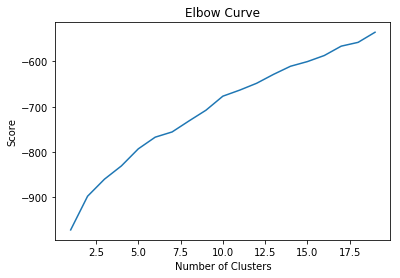

In [25]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl


with open("C://Dr. Bhandarkar- Directed Study//nounVectorsFastext.txt",'r') as myfile:
    tempdata=myfile.read()
opbrack=[]
closebrack=[]
for i in range(0,tempdata.__len__()):
    if tempdata[i]=='[':
        opbrack.append(i)
    if tempdata[i]==']':
        closebrack.append(i)
count=0
data=[]
while count<opbrack.__len__():
    data.append(tempdata[opbrack[count]+1:closebrack[count]])
    count=count+1
count=0
while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==" ":
            temp=temp.replace(temp[counter],"")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==",":
            temp=temp.replace(temp[counter]," ")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
X=[]
while count<data.__len__():
    temp=data[count]
    floats = [float(x) for x in temp.split()]
    X.append(floats)
    count=count+1
X=np.array(X)
Nc=range(1,20)
kmeans= [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

pl.plot(Nc,score)

pl.xlabel('Number of Clusters')

pl.ylabel('Score')

pl.title('Elbow Curve')

pl.show()

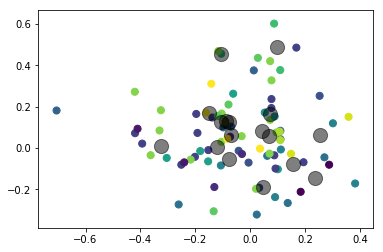

In [33]:
kmeans=KMeans(n_clusters=17)
kmeans.fit(X)
kmeansoutput=kmeans.predict(X)
pl.figure("Kmeans clustering")
plt.scatter(X[:, 0], X[:, 1], c=kmeansoutput, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)